In [1]:
import pandas as pd
import sys

import gudhi as gd
import numpy as np
import cechmate as cm
from ipywidgets import interactive, VBox
import seaborn as sns


# load data

In [ ]:

folder = '/...'
out_put_folder = folder
# output filenames
list_name = 'OAS_train_160_list'
community_name = 'OAS_train_160_communities'

# input features
feature_url = f'{folder}/OAS_train160_fea.xlsx'
data = pd.read_excel(feature_url, index_col=0)
data.head()





,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24
ID,,,,,,,,,,,,,,,,,,,,,
1,2.711453,-0.973867,0.385241,-0.756610,0.130759,-1.198882,0.595519,0.213517,0.264550,-0.464104,...,0.076832,1.607643,1.603364,-0.242028,0.050035,-0.843490,0.378375,-1.102907,0.661919,-0.377418
10,0.015169,0.568574,1.052790,0.218590,-0.333543,-0.554034,0.793523,-1.778906,-0.618784,-0.677925,...,-1.322576,0.295988,-0.716005,-0.738404,1.647051,-0.016207,0.526157,-1.722384,-0.777153,0.445018
100,2.373343,1.060458,0.227680,0.663599,-1.965164,0.090952,-1.341760,0.738128,0.785689,-0.227133,...,0.323408,1.526942,-0.844260,-0.538827,-0.908649,-0.184888,-1.266950,-0.628980,-0.026561,-1.342471
101,-0.797163,-0.017101,-0.310099,1.757750,-0.196908,0.151097,-2.460205,-0.679592,-1.207764,-0.680453,...,-1.595617,0.910681,2.019597,0.972674,1.230678,-1.170317,-1.632056,0.743061,2.379575,-1.144564
102,0.343389,0.369462,0.918993,-0.397073,-2.035956,0.850952,0.143151,0.329488,-1.926308,-0.835447,...,0.956938,-0.596871,-0.570402,-0.094824,-1.021563,-1.165472,-0.380473,-0.105686,1.449543,0.050235


# Correlation

In [ ]:
# pearson correlation
pearson_value = data.T.corr(method='pearson')
pearson_value.to_excel(f"{folder}/OAS_train160.xlsx")
pearson_value.head()

ID,1,10,100,101,102,103,104,105,106,107,...,90,91,92,93,94,95,96,97,98,99
ID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.012170,0.088868,0.118975,0.042034,0.236183,0.244251,-0.017652,0.108866,0.292933,...,-0.151866,-0.232586,0.023499,-0.000438,-0.255550,0.210830,0.324943,0.345711,0.061901,-0.142998
10,0.012170,1.000000,-0.021894,-0.114393,-0.137318,0.006109,-0.449457,0.248017,-0.243135,0.118338,...,0.180966,-0.046099,-0.022668,-0.057319,-0.399607,-0.045243,-0.155858,-0.091259,-0.075833,0.107594
100,0.088868,-0.021894,1.000000,0.064225,0.217240,0.051985,-0.096878,0.145698,-0.348030,-0.084994,...,0.072095,0.198251,-0.380002,-0.007086,0.188366,-0.282915,-0.293504,0.183219,-0.000767,0.260418
101,0.118975,-0.114393,0.064225,1.000000,0.067871,-0.475456,0.090491,-0.195984,0.170165,-0.121254,...,-0.163511,-0.020781,0.114093,-0.029466,0.563426,0.084261,-0.218765,0.183622,0.059550,-0.286563
102,0.042034,-0.137318,0.217240,0.067871,1.000000,-0.045708,-0.122589,0.070144,-0.139725,-0.202496,...,-0.162803,0.112674,-0.249068,0.053724,0.095730,0.113026,-0.033908,-0.229987,-0.235751,-0.051283


In [4]:
index_list = list(pearson_value.index)
cor_v_list = list()
count = 0
for index, row in pearson_value.iterrows():
    for i in list(range(len(index_list))):
        if i >= count:
            cor_v = row[index_list[i]]
            cor_v_list.append([index, index_list[i], cor_v])
    count = count+1
    
pd_cor_v_list = pd.DataFrame(cor_v_list, columns = ['x','y','correlation_value'])
pd_cor_v_list['distance'] = 1-pd_cor_v_list['correlation_value']
pd_cor_v_list_without_same_img =  pd_cor_v_list.query('x != y') # delete self connection


In [5]:
pd_cor_v_list_without_same_img["pair"] = pd_cor_v_list_without_same_img.apply(lambda row: np.array([int(row['x']), int(row['y'])]) if int(row['x']) < int(row['y']) else np.array([int(row['y']), int(row['x'])]), axis = 1)
pd_cor_v_list_without_same_img



/tmp/ipykernel_2731630/1906378868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_cor_v_list_without_same_img["pair"] = pd_cor_v_list_without_same_img.apply(lambda row: np.array([int(row['x']), int(row['y'])]) if int(row['x']) < int(row['y']) else np.array([int(row['y']), int(row['x'])]), axis = 1)


,x,y,correlation_value,distance,pair
1,1,10,0.012170,0.987830,"[1, 10]"
2,1,100,0.088868,0.911132,"[1, 100]"
3,1,101,0.118975,0.881025,"[1, 101]"
4,1,102,0.042034,0.957966,"[1, 102]"
5,1,103,0.236183,0.763817,"[1, 103]"
...,...,...,...,...,...
14188,96,98,-0.083519,1.083519,"[96, 98]"
14189,96,99,0.130794,0.869206,"[96, 99]"
14191,97,98,-0.215623,1.215623,"[97, 98]"
14192,97,99,-0.045126,1.045126,"[97, 99]"


# Functions

In [ ]:

# get subjects and edges
def get_values(query_results, old_member_members, old_member_pairs):
    member = query_results[['pair']]
    member_v = member.values.flatten() # subject pairs
    member_x = []
    if len(member_v) > 0:
        member_x = list(set(np.hstack(member_v).flatten())) # subjects
    subject_count = len(member_x) # number of subjects
    member_v = list(set([tuple(i) for i in member_v])) # subject pairs
    
    new_member_members = list(set(member_x) - set(old_member_members)) # new subjects
    new_member_pairs = list(set(member_v) - set(old_member_pairs)) # new subject pairs
    
    return member_v, member_x, subject_count, new_member_members, new_member_pairs

# communities connect with edges start #
# example: community_generation([(1,2), (2, 3), (3, 4), (5, 6), (7, 8)])
def community_generation(edges):
    final_edges = [list(i) for i in edges] # [(1,2), (2, 3), (3, 4), (5, 6), (7, 8)]
    edges_index = list(range(len(final_edges))) # [0, 1, 2, 3, 4]
    # print(index)
    while len(edges_index) > 1:
        remove_edge_list_is_null = True
        #combine edges
        res = []
        for i in edges_index:
            if i > 0:
                new_edge_list = []
                remove_edge_list = []
                for j in range(i):
                    perious_edge = final_edges[j]
                    edge = final_edges[i]

                    #find common nodes
                    set_edge = set(perious_edge) & set(edge)
                    common_node = list(set_edge)

                    if len(common_node)>0:
                        un_list = list(set(list(set(perious_edge).union(set(edge))))) # [1, 2, 3]
                        un_list.sort()
                        new_edge_list.append(un_list) # [1, 2, 3]
                        remove_edge_list.append(perious_edge) # [[1,2]]
                        remove_edge_list.append(edge) # [[1,2], [2,3]]
                        remove_edge_list_is_null = False
                if not remove_edge_list_is_null:
                    remove_edge_list = [list(i) for i in remove_edge_list]
                    [res.append(x) for x in final_edges if list(x) not in remove_edge_list] # [[3, 4], [5, 6], [7, 8]]
                    [res.append(x) for x in new_edge_list] # [[3, 4], [5, 6], [7, 8], [1, 2, 3]]
                    final_edges = res # [[3, 4], [5, 6], [7, 8], [1, 2, 3]]
                    edges_index = list(range(len(final_edges))) #[0, 1, 2, 3]
                    break
        
        if remove_edge_list_is_null:
            break
    return final_edges
#communities connect with edges end#
# check wheather new added number lower than critical_point
def check_new_subject_in_community_size(old_member_communities, member_communities, critical_point = 20):
    a = old_member_communities
    b = member_communities
    set1 = set(map(tuple, a))
    set2 = set(map(tuple, b))

    diff = list(list(i) for i in list(set2 - set1))

    diff_len_list = []
    for i in diff:
        if len(i) > 2:
            subset_items = []
            for j in a:
                if set(j).issubset(set(i)):
                    subset_items.append(j)
            len_community = len(subset_items)
            if len(subset_items) > 0:
                subset_items = np.hstack(subset_items).flatten()
            
            diff2 = set(i) - set(subset_items)
            
            len_diff = len(diff2) + len_community
                        
            diff_len_list.append(len_diff)

    higher_than_critical_point = False
    if len(diff_len_list) > 0:
        higher_than_critical_point = (np.array(diff_len_list) >= critical_point).any()
        # print(diff_len_list, critical_point)
        # print(higher_than_critical_point)
        # print("*******")
    return higher_than_critical_point     

In [ ]:
communities = list()
old_member_members = []
new_member_members = []
old_member_pairs = []
new_member_pairs = []
old_member_communities = []
new_subject_count = 0
mni_range = 0.001 # if the number of added nodes higher than critical_point minimalize the scale range
higher_than_critical_point = False

scale_range = 0.02# initial max scale range
i = round(1-scale_range, 3) # second max scale
j = 1 # max scale

while i > 0:
    # print('i', i)
    sort_v = pd_cor_v_list_without_same_img.sort_values(by = 'correlation_value', axis=0)
    query_results = sort_v.query('correlation_value >= @i').query('correlation_value != 1') # find records higher than scale i
    member_subjects, member_members, subject_count, new_member_members, new_member_pairs = get_values(query_results, old_member_members, old_member_pairs) # got new pairs
    new_subject_count = len(new_member_members)
    member_communities = community_generation(member_subjects) # got communities
    higher_than_critical_point = check_new_subject_in_community_size(old_member_communities, member_communities) # check whether the number of added nodes is higher than critical_point
    # print((not higher_than_critical_point))
    # scale_out = True
    if i > j: # while minimalize the scale range, the i should not larger than j
        print("error")
    if (not higher_than_critical_point) or i == j-mni_range: # j-mni_range is the largest value of i if higher_than_critical_point still True
        if new_subject_count > 0:
            communities.append([member_subjects, subject_count, member_members, new_member_members, new_member_pairs, new_subject_count, i, member_communities])
            old_member_members = member_members
            old_member_pairs = member_subjects
            old_member_communities = member_communities
        j = i
        i = round(i-scale_range, 3)
        # print("***********")
        # print(i, j)
    else:
        i = round(i + mni_range, 3) # if number of added nodes is higher than critical point minimalize the scale range 

    if subject_count == pearson_value.shape[1]:
        break
    
# j = i
# i = i-scale_range
# print("###", i, j)
pd_communities = pd.DataFrame(communities, columns = ['subjects', 'subject_count', 'members', 'new_member_members', 'new_member_pairs', 'new_subject_count', 'scale', 'final_edges'])
pd_communities.to_excel(f"{out_put_folder}/{list_name}.xlsx")
pd_communities.head()




,lesions,lesion_count,members,new_member_members,new_member_pairs,new_lesion_count,scale,final_edges
0,"[(82, 94)]",2,"[82, 94]","[82, 94]","[(82, 94)]",2,0.73,"[[82, 94]]"
1,"[(36, 116), (82, 94), (58, 94)]",5,"[36, 82, 116, 58, 94]","[116, 58, 36]","[(36, 116), (58, 94)]",3,0.72,"[[36, 116], [58, 82, 94]]"
2,"[(58, 94), (36, 116), (82, 94), (11, 141)]",7,"[36, 11, 141, 82, 116, 58, 94]","[11, 141]","[(11, 141)]",2,0.71,"[[36, 116], [11, 141], [58, 82, 94]]"
3,"[(67, 162), (58, 94), (36, 116), (11, 141), (8...",9,"[162, 67, 36, 11, 141, 82, 116, 58, 94]","[162, 67]","[(67, 162)]",2,0.69,"[[67, 162], [36, 116], [11, 141], [58, 82, 94]]"
4,"[(67, 162), (58, 94), (53, 84), (36, 116), (11...",11,"[162, 67, 36, 11, 141, 82, 84, 53, 116, 58, 94]","[84, 53]","[(53, 84)]",2,0.68,"[[67, 162], [53, 84], [36, 116], [11, 141], [5..."


In [12]:

#communities to steps start#
communities = pd_communities
step_list = []
count = 1
pd_sub_communities = pd.DataFrame()
for index, value in communities.iterrows():
    row_v = value['final_edges']
    row_v = [[i] for i in row_v]
    scale = value['scale']
    
    pd_communities_i = pd.DataFrame(row_v, columns = [f'step_{count}_{index}_{scale}'])
    pd_sub_communities = pd.concat([pd_sub_communities, pd_communities_i], axis=1)
    count = count+1
pd_sub_communities
#communities to steps end#


,step_1_0_0.73,step_2_1_0.72,step_3_2_0.71,step_4_3_0.69,step_5_4_0.68,step_6_5_0.66,step_7_6_0.64,step_8_7_0.63,step_9_8_0.62,step_10_9_0.6,...,step_24_23_0.463,step_25_24_0.457,step_26_25_0.451,step_27_26_0.441,step_28_27_0.421,step_29_28_0.411,step_30_29_0.401,step_31_30_0.391,step_32_31_0.381,step_33_32_0.341
0,"[82, 94]","[36, 116]","[36, 116]","[67, 162]","[67, 162]","[67, 162]","[67, 162]","[67, 162]","[67, 162]","[67, 162]",...,"[133, 167]","[133, 167]","[133, 167]","[50, 128]","[50, 128]","[50, 128]","[50, 128]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,NaN,"[58, 82, 94]","[11, 141]","[36, 116]","[53, 84]","[53, 84]","[53, 84]","[119, 130]","[119, 130]","[119, 130]",...,"[50, 128]","[50, 128]","[50, 128]","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,NaN
2,NaN,NaN,"[58, 82, 94]","[11, 141]","[36, 116]","[31, 87]","[31, 87]","[53, 84]","[25, 122]","[25, 122]",...,"[79, 136]","[79, 136]","[79, 136]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,"[58, 82, 94]","[11, 141]","[36, 116]","[36, 116]","[31, 87]","[60, 89]","[60, 89]",...,"[4, 124]","[4, 124]","[4, 124]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,"[58, 82, 94]","[11, 141]","[11, 141]","[36, 116]","[90, 126]","[90, 126]",...,"[18, 29, 34]","[18, 29, 34]","[72, 85, 144]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,"[58, 82, 94]","[60, 89]","[11, 141]","[53, 84]","[53, 84]",...,"[72, 85, 144]","[72, 85, 144]","[2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,"[58, 82, 94, 121]","[60, 89]","[31, 87]","[31, 87]",...,"[51, 74, 106, 157]","[2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2, 108]","[36, 116]","[36, 116]",...,"[12, 52, 117, 166]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[58, 82, 94, 121]","[11, 141]","[11, 141]",...,"[2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 15, 19, 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[74, 157]","[132, 163]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:

#sort communities start#
pd_communities_columns = pd_sub_communities.columns
new_pd_communities = pd.DataFrame()
for m in list(range(len(list(pd_communities_columns)))):
    column = pd_communities_columns[m]
    diff_column = f'diff_{column}'
    step2_c = pd_communities_columns[m]
    step2 = pd_sub_communities[step2_c].values
    step2 = [x for x in step2 if str(x) != 'nan']
    new_images = []
    if m!=0: # check difference from column 2
        step2 = pd_sub_communities[step2_c].values
        step2 = [x for x in step2 if str(x) != 'nan']
        step1_c = pd_communities_columns[m-1]
        step1 = new_pd_communities[step1_c].values
        step1 = [x for x in step1 if str(x) != 'nan']
        
        new_step2 = []
        new_step2_diff = []
        
        step2_new_v = step2
        
        for i in step1:
            new_v = []
            diff_v = []
            diff_v_list = []
            diff_other_items = []
            if i in step2: # if the step 1's item i also in step 2 then new_v = the item i
                new_v = i
            elif i != []: # if the item i is not in step 2 but not []
                for n in i: # check whether the value merged into other community
                    for j in step2:
                        if n in j: # if the value in the item i also in step2's item j then the new_v = item_j
                            new_v = j
                            break              
                diff_v_items = []
                for m in step1: # get communites in step1 merged in step 2 (check whether other items in step1 is the subset of new_v)
                    if set(m).issubset(new_v) and len(m)!=0:
                        diff_v.append(m)

                diff_v_items_flatten = []
                for i in diff_v:
                    diff_v_items_flatten = diff_v_items_flatten+i
                diff_other_items = list(set(new_v)-set(diff_v_items_flatten)) # other new nodes added to the communities at step2

                diff_v_list.append(diff_v)
                diff_v_list.append([diff_other_items])
            # print(diff_v_list)
            new_step2_diff.append(diff_v_list) # add merged communities in new_step2_diff
            new_images.append(len(diff_v)+len(diff_other_items)) # number of new communities and nodes
            
            new_step2.append(new_v)
            if new_v!=[]:
                step2_new_v.remove(new_v) # remove items already in step1 (1. already in step1; 2. merged as a new community in step2)
                # in the final step2_new_v keep all items new added at step2
                
        [new_step2.append(j) for j in step2_new_v] # add all items new added at step2
        [new_step2_diff.append(j) for j in step2_new_v] # add all items new added at step2
    else:
        new_step2 = step2
        new_step2_diff = []
        
    new_step2 = [[i] for i in new_step2]
    new_step2_diff = [[i] for i in new_step2_diff]
    
    diff_column = f"{diff_column}_{new_images}"
    pd_communities_i = pd.DataFrame(new_step2, columns = [column])
    
    pd_communities_i_diff = pd.DataFrame(new_step2_diff, columns = [diff_column]) #new_step2_diff keep items different from previous step
    
    new_pd_communities = pd.concat([new_pd_communities,pd_communities_i, pd_communities_i_diff], axis=1)
new_pd_communities.to_excel(f"{out_put_folder}/{community_name}.xlsx")

new_pd_communities
#sort communities end#

,step_1_0_0.73,diff_step_1_0_0.73_[],step_2_1_0.72,diff_step_2_1_0.72_[2],step_3_2_0.71,"diff_step_3_2_0.71_[0, 0]",step_4_3_0.69,"diff_step_4_3_0.69_[0, 0, 0]",step_5_4_0.68,"diff_step_5_4_0.68_[0, 0, 0, 0]",...,step_29_28_0.411,"diff_step_29_28_0.411_[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",step_30_29_0.401,"diff_step_30_29_0.401_[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",step_31_30_0.391,"diff_step_31_30_0.391_[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",step_32_31_0.381,"diff_step_32_31_0.381_[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",step_33_32_0.341,"diff_step_33_32_0.341_[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
0,"[82, 94]",NaN,"[58, 82, 94]","[[[82, 94]], [[58]]]","[58, 82, 94]",[],"[58, 82, 94]",[],"[58, 82, 94]",[],...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ..."
1,NaN,NaN,"[36, 116]","[36, 116]","[36, 116]",[],"[36, 116]",[],"[36, 116]",[],...,[],[],[],[],[],[],[],[],[],[]
2,NaN,NaN,NaN,NaN,"[11, 141]","[11, 141]","[11, 141]",[],"[11, 141]",[],...,[],[],[],[],[],[],[],[],[],[]
3,NaN,NaN,NaN,NaN,NaN,NaN,"[67, 162]","[67, 162]","[67, 162]",[],...,[],[],[],[],[],[],[],[],[],[]
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[53, 84]","[53, 84]",...,[],[],[],[],[],[],[],[],[],[]
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],[],[],[],[],[],[]
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],[],[],[],[],[],[]
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],[],[],[],[],[],[]
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],[],[],[],[],[],[]
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],[],[],[],[],[],[]


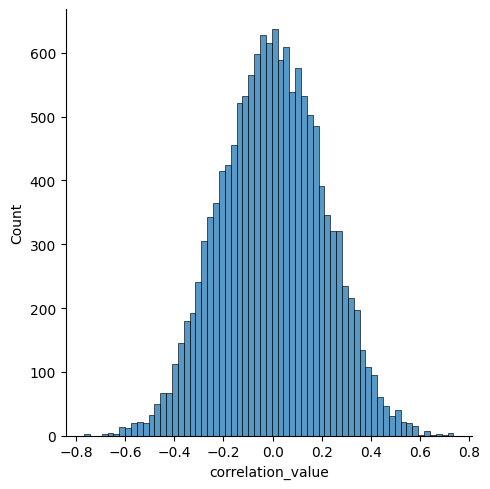

In [9]:
import matplotlib.pyplot as plt
sns.displot(pd_cor_v_list_without_same_img, x="correlation_value")
plt.show()


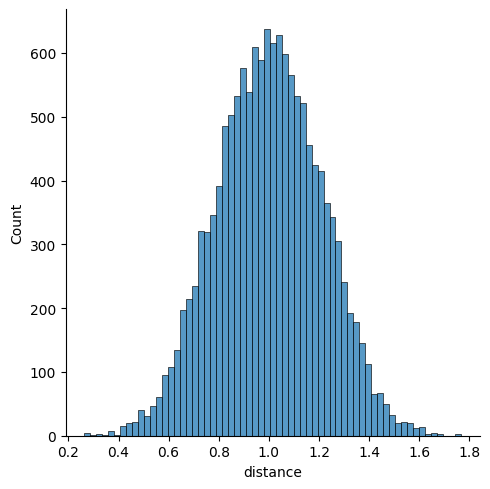

In [10]:
sns.displot(pd_cor_v_list_without_same_img, x="distance")
plt.show()
